In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#from google.colab.patches import cv2_imshow

## **Test Case 3**

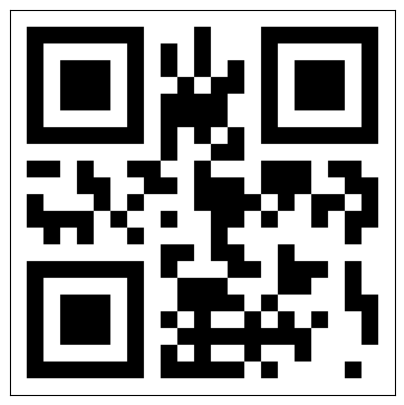

In [9]:
img = cv2.imread("/Users/johnmohsenwadie/Desktop/ASU/AGILE/Yalla-N_Scan/Test Cases QR/03-Leffy-bina-ya-donya.png", cv2.IMREAD_GRAYSCALE)
#_, img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
img = cv2.rotate(img, cv2.ROTATE_180)
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img, cmap='gray');

## **Test Case 2 but it has problems**

In [10]:
def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result

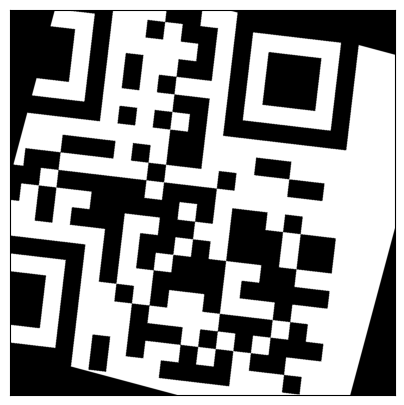

In [11]:
img = cv2.imread("/Users/johnmohsenwadie/Desktop/ASU/AGILE/Yalla-N_Scan/Test Cases QR/02-Matsawar-3edel-ya3am.png", cv2.IMREAD_GRAYSCALE)
_, img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
img = rotate_image(img,345)
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img, cmap='gray');

## **Test Case 4**

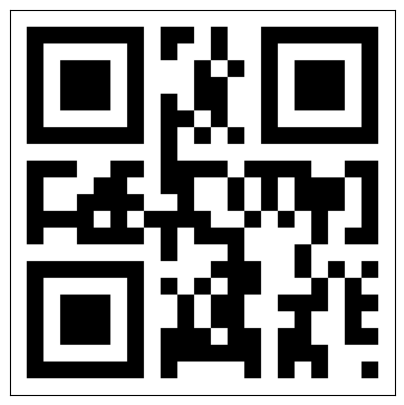

In [12]:
img = cv2.imread("/Users/johnmohsenwadie/Desktop/ASU/AGILE/Yalla-N_Scan/Test Cases QR/04-Black-mirror.png")
img = 255 - img
_, img = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)
img = cv2.flip(img, 1)
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img, cmap='gray');

## **Trying to generalize**

In [13]:
def generalize_preprocessing(img_path):

    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    preprocess_steps = [
        lambda x: x,
        cv2.bitwise_not,
        lambda x: cv2.rotate(x, cv2.ROTATE_90_CLOCKWISE),
        lambda x: cv2.rotate(x, cv2.ROTATE_180),
        lambda x: cv2.rotate(x, cv2.ROTATE_90_COUNTERCLOCKWISE),
    ]

    for step in preprocess_steps:
        processed_img = step(img)
        img_threshold = cv2.adaptiveThreshold(processed_img, 255,
                                              cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                              cv2.THRESH_BINARY, 11, 2)
        plt.figure(figsize=(5, 5))
        plt.imshow(img_threshold, cmap='gray')
        plt.xticks([], [])
        plt.yticks([], [])
        plt.show()

## **Test Case 7 the mighty Zinger**

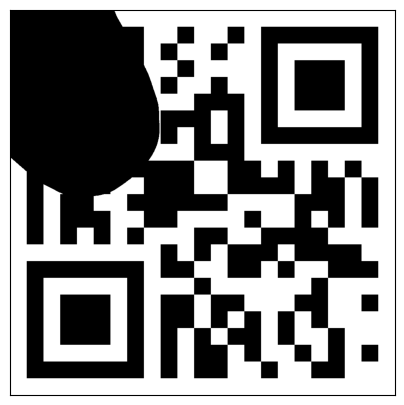

In [14]:
image_path = '/Users/johnmohsenwadie/Desktop/ASU/AGILE/Yalla-N_Scan/Test Cases QR/07-THE-MIGHTY-FINGER.png'
image = cv2.imread(image_path)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, img = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)

#inpainted_image = cv2.inpaint(image, img, 7, cv2.INPAINT_TELEA)
#inpainted_image = image - inpainted_image
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img, cmap='gray');

## **Test Case 8**

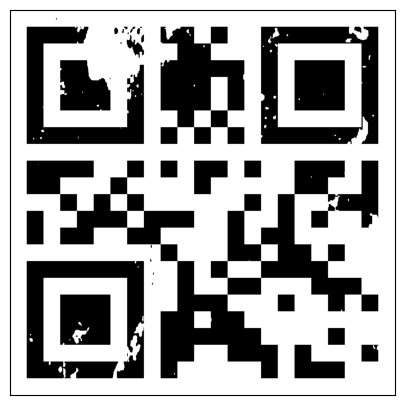

In [15]:
img = cv2.imread("/Users/johnmohsenwadie/Desktop/ASU/AGILE/Yalla-N_Scan/Test Cases QR/08-Compresso-Espresso.png")
_, img = cv2.threshold(img, 173, 255, cv2.THRESH_BINARY)
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img, cmap='gray');

# **Test case: 10 and now it is similar to test case 7 the mighty Zinger. **

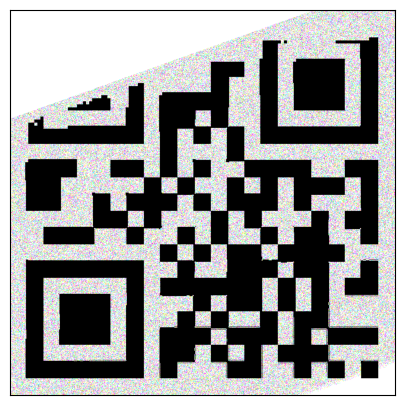

In [16]:
img = cv2.imread("/Users/johnmohsenwadie/Desktop/ASU/AGILE/Yalla-N_Scan/Test Cases QR/10-Gone-With-The-Wind.png")
img = 255 - img
_, img = cv2.threshold(img, 53, 255, cv2.THRESH_BINARY_INV)
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img, cmap='gray');

## **Test Case 12**

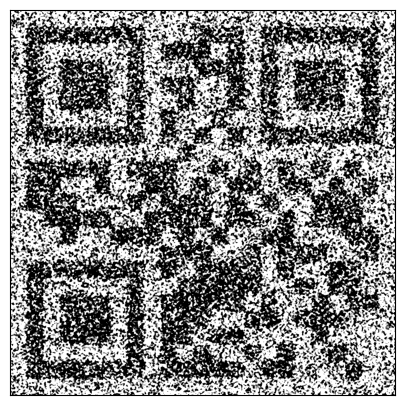

In [17]:
img = cv2.imread("/Users/johnmohsenwadie/Desktop/ASU/AGILE/Yalla-N_Scan/Test Cases QR/12-mal7-w-felfel.png", cv2.IMREAD_GRAYSCALE)
_, img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
img = cv2.medianBlur(img,5)
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img, cmap='gray');

## **Test Case 13**

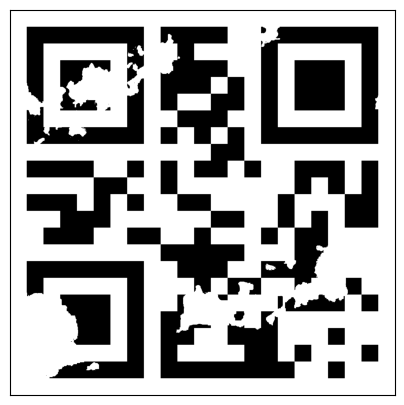

In [18]:
img = cv2.imread("/Users/johnmohsenwadie/Desktop/ASU/AGILE/Yalla-N_Scan/Test Cases QR/13-2el-noor-2ata3.png", cv2.IMREAD_GRAYSCALE)
_, img = cv2.threshold(img, 1, 255, cv2.THRESH_BINARY)
#img = cv2.medianBlur(img,5)
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img, cmap='gray');

## **Test Case 14**

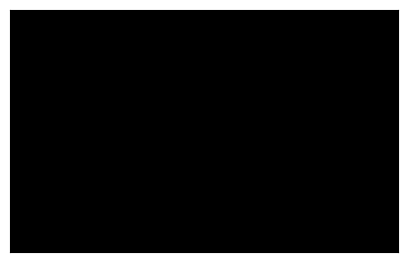

In [19]:
img = cv2.imread("/Users/johnmohsenwadie/Desktop/ASU/AGILE/Yalla-N_Scan/Test Cases QR/14-BANANAAA!!!.png", cv2.IMREAD_GRAYSCALE)
_, img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
img = rotate_image(img,-22)

#awl parameter ymeen w shemal wel tany foo2 w taht
tl = (542,585)
bl = (540,715)
tr = (678,587)
br = (675,715)

cv2.circle(img , tl , 5 ,(0,0,255),-1)
cv2.circle(img , bl , 5 ,(0,0,255),-1)
cv2.circle(img , tr , 5 ,(0,0,255),-1)
cv2.circle(img , br , 5 ,(0,0,255),-1)

#pts1 = [tl , br , tr , br]
#pts2 = [[0,0] , [0,480] , [640,0],[640,480]]

pts1 = np.array([tl, br, tr, br], dtype=np.float32)
pts2 = np.array([[0,0] , [0,480] , [640,0],[640,480]], dtype=np.float32)

matrix = cv2.getPerspectiveTransform(pts1,pts2)
img = cv2.warpPerspective(img,matrix,(800,500))

fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img, cmap='gray');

#Test Case 5 Caeser-Cipher


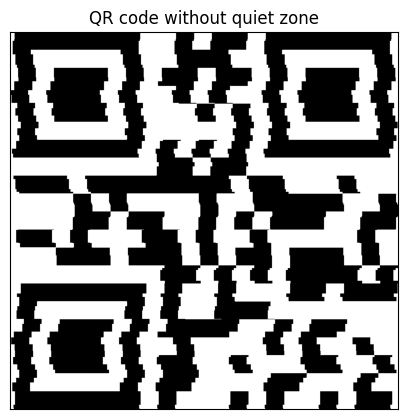

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the new image and convert to grayscale
img_path = "/Users/johnmohsenwadie/Desktop/ASU/AGILE/Yalla-N_Scan/Test Cases QR/05-Caesar-cipher.png"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Adjust the binarization threshold to improve quiet zone detection
_, img_binary = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)

# Reinitialize the start and end positions for rows and columns
start_row = -1
start_col = -1
end_row = -1
end_col = -1

# Find the first black pixel in each row and column to set boundaries
# Find start row
for row_index in range(img_binary.shape[0]):
    if any(img_binary[row_index] < 255):
        start_row = row_index
        break

# Find end row
for row_index in range(img_binary.shape[0] - 1, -1, -1):
    if any(img_binary[row_index] < 255):
        end_row = row_index + 1
        break

# Find start column
for col_index in range(img_binary.shape[1]):
    if any(img_binary[:, col_index] < 255):
        start_col = col_index
        break

# Find end column
for col_index in range(img_binary.shape[1] - 1, -1, -1):
    if any(img_binary[:, col_index] < 255):
        end_col = col_index + 1
        break

# Check if the boundaries are valid
if (start_row >= 0 and end_row > start_row) and (start_col >= 0 and end_col > start_col):
    # Crop the image using the detected boundaries
    qr_no_quiet_zone = img_binary[start_row:end_row, start_col:end_col]

    # Display the QR code without the quiet zone
    fig = plt.figure(figsize=(5, 5))
    plt.xticks([], [])
    plt.yticks([], [])
    plt.title("QR code without quiet zone")
    plt.imshow(qr_no_quiet_zone, cmap="gray")
    plt.show()  # Display the corrected image
else:
    print("Error: Could not find valid boundaries. Please check the image or preprocessing.")


# Test Case 6 Railfence-Cipher

/var/folders/xd/m03fffl12yg6w4cjfgzx_59w0000gn/T/ipykernel_22776/3089297676.py:20: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


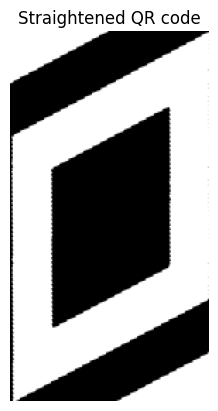

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the new image and convert it to grayscale
img_path = "/Users/johnmohsenwadie/Desktop/ASU/AGILE/Yalla-N_Scan/Test Cases QR/06-Railfence-cipher.png"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Apply binarization with a threshold to create a binary image
_, img_binary = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

# Detect edges and contours to find the bounding box of the QR code
edges = cv2.Canny(img_binary, 100, 200)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the largest contour and get the minimum area rectangle to straighten the QR code
largest_contour = max(contours, key=cv2.contourArea)
rect = cv2.minAreaRect(largest_contour)
box = cv2.boxPoints(rect)
box = np.int0(box)

# Define the width and height for the perspective transformation
width = int(rect[1][0])
height = int(rect[1][1])

# Define source and destination points for perspective transformation
src_pts = box.astype("float32")
dst_pts = np.array([[0, height - 1], [0, 0], [width - 1, 0], [width - 1, height - 1]], dtype="float32")

# Create the perspective transformation matrix and apply it to straighten the QR code
M = cv2.getPerspectiveTransform(src_pts, dst_pts)
straightened_qr = cv2.warpPerspective(img_binary, M, (width, height))

# Display the straightened QR code
plt.imshow(straightened_qr, cmap="gray")
plt.title("Straightened QR code")
plt.axis("off")
plt.show()
